<a href="https://colab.research.google.com/github/maryambahri/Crypto_Economic_Spillover/blob/main/Scripts/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#loading all libraries here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [8]:
#cloning the repository here
!git clone https://github.com/maryambahri/Crypto_Economic_Spillover


Cloning into 'Crypto_Economic_Spillover'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 56 (delta 11), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (56/56), 3.95 MiB | 6.68 MiB/s, done.
Resolving deltas: 100% (11/11), done.


# Loading market related indeces

## 1) Bitcoin

In [9]:
# Load bitcoin prices data, we will use static data from Kaggle data
# Source URL: https://www.kaggle.com/datasets/oscardavidperilla/historical-bitcoin-prices-btc?resource=download

path="Crypto_Economic_Spillover/Raw/Bitcoin_Hist_Data.csv"
raw_bitcoin=pd.read_csv(path)
raw_bitcoin.head()

,open,high,low,close,volume,close_time,quote,takers_buy_base,takers_buy_quote
0,4261.48,4313.62,4261.32,4308.83,47.181009,2017-08-16 23:59:59.999000-05:00,202366.138393,35.160503,150952.477943
1,4308.83,4328.69,4291.37,4315.32,23.234916,2017-08-17 00:59:59.999000-05:00,100304.823567,21.448071,92608.279728
2,4330.29,4345.45,4309.37,4324.35,7.229691,2017-08-17 01:59:59.999000-05:00,31282.312670,4.802861,20795.317224
3,4316.62,4349.99,4287.41,4349.99,4.443249,2017-08-17 02:59:59.999000-05:00,19241.058300,2.602292,11291.347015
4,4333.32,4377.85,4333.32,4360.69,0.972807,2017-08-17 03:59:59.999000-05:00,4239.503586,0.814655,3552.746817


In [21]:
# Now we start building historical bitcoin in the format that would work for our analysis

bitcoin=raw_bitcoin.copy().sort_values(by='close_time', ascending=True).drop(columns=['quote', 'takers_buy_base', 'takers_buy_quote']) # we make a copy of the raw data and make sure data is sorted

# Convert to datetime and extract only the date
# Ensure the column is treated as a string before conversion
bitcoin['Date'] = bitcoin['close_time'].astype(str) # added a separate column for date
bitcoin['close_time'] = bitcoin['close_time'].astype(str)

# Convert to datetime, allowing mixed formats
bitcoin['Date'] = pd.to_datetime(bitcoin['Date'], format='mixed', errors='coerce')
bitcoin['close_time'] = pd.to_datetime(bitcoin['close_time'], errors='coerce')

# Extract only the date
bitcoin['Date'] = bitcoin['Date'].dt.date

# Find the day of the date
bitcoin['Day'] = pd.to_datetime(bitcoin['Date']).dt.day_name()

# Extract only the time part
bitcoin['close_time'] = bitcoin['close_time'].dt.time

# Filter rows where time is '23:59:59.999000'
target_time = pd.to_datetime('23:59:59.999000').time()
bitcoin = bitcoin[bitcoin['close_time'] == target_time].reset_index(drop=True)

#Now we made sure we have the very last and most updated data for each day

In [23]:
# Perform EDA

print(f" Display general information on features and their types:\n {bitcoin.info()} \n\n")

print(f" Display general statistics on the data itself: \n {bitcoin.describe()} \n\n")

print(f" Verify what is the status of nulls:\n {bitcoin.isna().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593 entries, 0 to 1592
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   open        1593 non-null   float64
 1   high        1593 non-null   float64
 2   low         1593 non-null   float64
 3   close       1593 non-null   float64
 4   volume      1593 non-null   float64
 5   close_time  1593 non-null   object 
 6   year        1593 non-null   object 
 7   Date        1593 non-null   object 
 8   Day         1593 non-null   object 
dtypes: float64(5), object(4)
memory usage: 112.1+ KB
 Display general information on features and their types:
 None 


 Display general statistics on the data itself: 
                open          high           low         close        volume
count   1593.000000   1593.000000   1593.000000   1593.000000   1593.000000
mean   17543.966491  17641.284011  17439.541638  17541.661682   1739.443602
std    17334.901144  17428.344839  17237.080

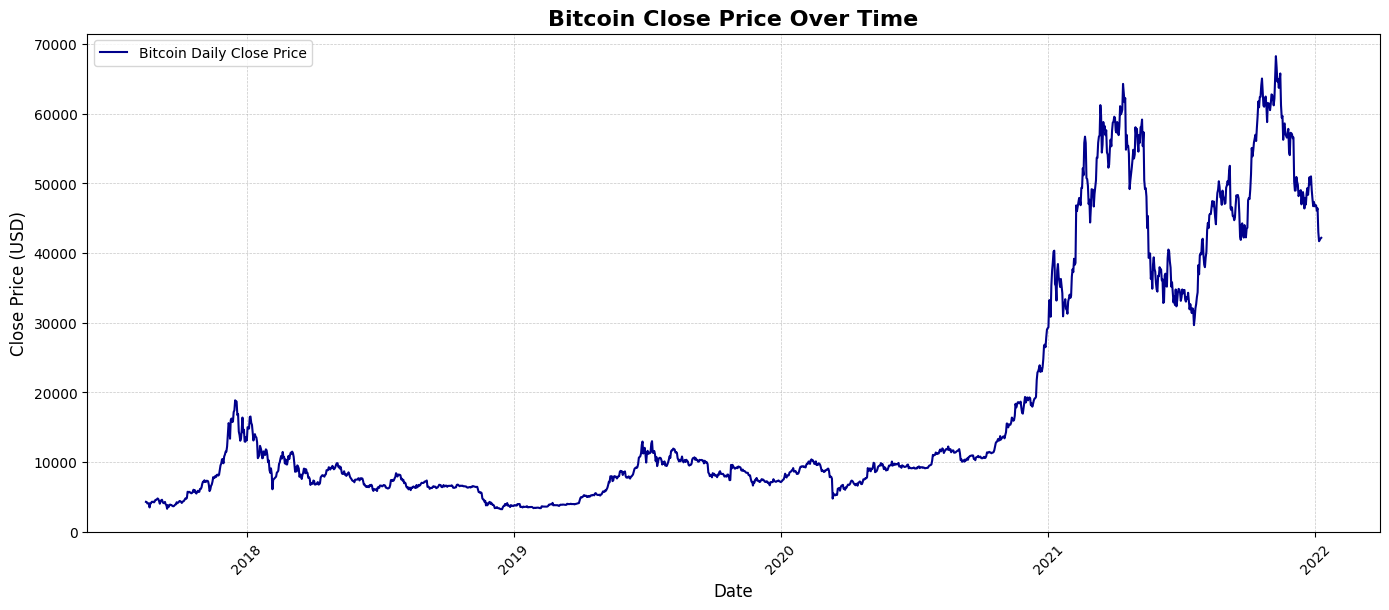

In [28]:
# time series plot for close vs close_time

# Sort by time just in case
bitcoin = bitcoin.sort_values('Date')


plt.figure(figsize=(14, 6))


# Plot the line and store the object
btc_line, = plt.plot(
    bitcoin['Date'],
    bitcoin['close'],
    color='darkblue',
    linewidth=1.5,
    label='Bitcoin Daily Close Price'
)

# Add legend using the line object
plt.legend(handles=[btc_line], loc='upper left')

# Beautify the plot
plt.title('Bitcoin Close Price Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price (USD)', fontsize=12)
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(loc='upper left')
plt.tight_layout()

# Format x-axis with better date ticks
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

plt.show()

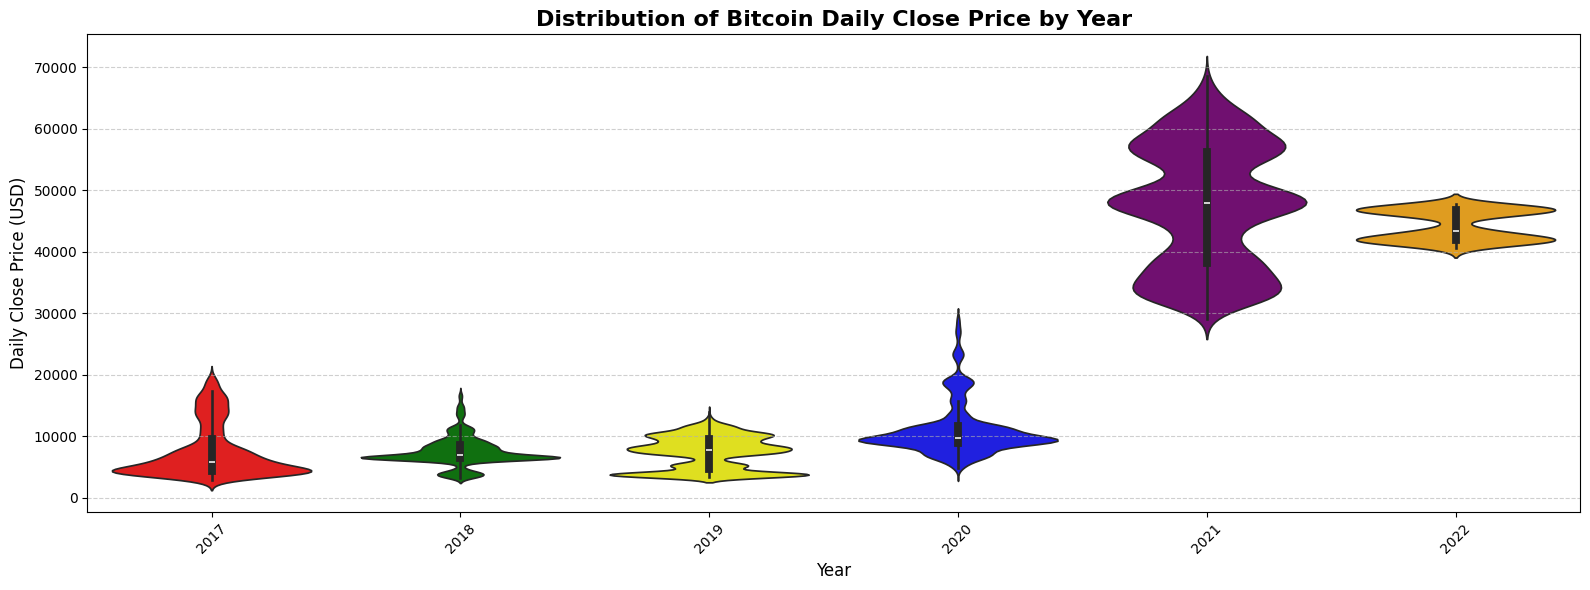

In [31]:
# we examine the annual distribution of close price

# Ensure datetime is correct and extract numeric year
bitcoin['Date'] = pd.to_datetime(bitcoin['Date'], format='mixed')
bitcoin['year'] = bitcoin['Date'].dt.year.astype(str)  # Ensure year is string for categorical hue

# Get sorted list of unique years as strings
unique_years = sorted(bitcoin['year'].unique())
custom_colors = ['red', 'green', 'yellow', 'blue', 'purple', 'orange'] * (len(unique_years) // 6 + 1)

# Map each year to a color
year_color_map = dict(zip(unique_years, custom_colors[:len(unique_years)]))

# Plot
plt.figure(figsize=(16, 6))
sns.violinplot(
    data=raw_bitcoin,
    x='year',
    y='close',
    hue='year',
    palette=year_color_map,
    inner='box',
    legend=False  # avoid duplicate legends since hue=x
)

# Labels and styling
plt.title('Distribution of Bitcoin Daily Close Price by Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Daily Close Price (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

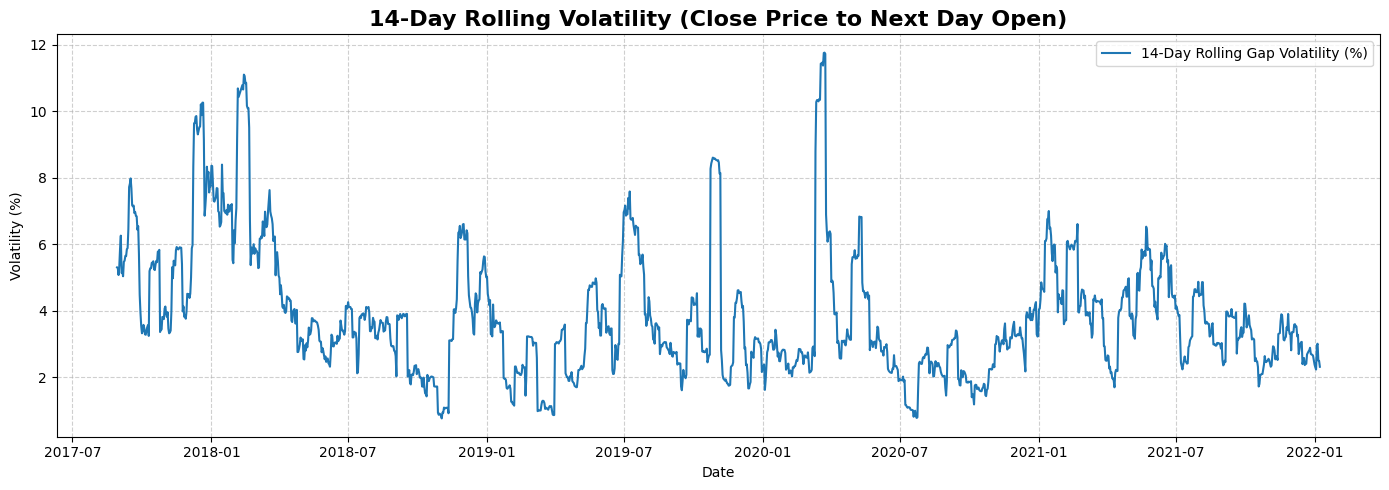

In [34]:
# we now examine day to day volatility between close price and day+1 open price

# Ensure datetime, sort oldest tonewest
bitcoin = bitcoin.sort_values("Date")

#add next day open price
bitcoin['next_day_open'] = bitcoin['open'].shift(-1)

# we now plot rolling volatility to see how market volatility changes, helping explain model uncertainty and risk periods

# Gap return: Close(t) to Open(t+1)
bitcoin["gap_return_pct"] = (bitcoin["next_day_open"] / bitcoin["close"] - 1) * 100

# Drop last row (no next day open)
gap = bitcoin.dropna(subset=["gap_return_pct"]).set_index("Date")

# Rolling volatility of the gap return
window = 14
gap["gap_volatility_pct"] = gap["gap_return_pct"].rolling(window=window).std()

# Plot
plt.figure(figsize=(14, 5))
vol_line, = plt.plot(
    gap.index,
    gap["gap_volatility_pct"],
    linewidth=1.5,
    label=f"{window}-Day Rolling Gap Volatility (%)"
)

plt.legend(handles=[vol_line], loc="upper right")
plt.title(f"{window}-Day Rolling Volatility (Close Price to Next Day Open)", fontsize=16, fontweight="bold")
plt.xlabel("Date")
plt.ylabel("Volatility (%)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()